<a href="https://colab.research.google.com/github/aimaaaaan/design_project_cse4610/blob/main/Artwork_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install metric-learn scikit-learn tensorflow keras tqdm pillow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 7.4 MB/s eta 0:00:00


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from datasets import load_dataset
from tqdm import tqdm
import os

# Load a smaller subset to manage space
wikiart = load_dataset("huggan/wikiart", split="train[:5000]")

# Initialize CNN feature extractor once
cnn = ResNet50(weights="imagenet", include_top=False, pooling="avg")

batch_size = 32
features_list = []
labels_list = []

def extract_features(images):
    images = np.array(images)
    images = preprocess_input(images)
    return cnn.predict(images, verbose=0)

def process_and_save_features(dataset, save_path="features.npy", label_path="labels.npy"):
    feature_batches = []
    label_batches = []
    for i in tqdm(range(0, len(dataset), batch_size)):
        batch = dataset[i:i+batch_size]

        # Preprocess images: convert PIL Images to numpy arrays resized to 224x224
        np_images = []
        for img in batch["image"]:
            arr = np.array(img.convert("RGB").resize((224, 224)))
            np_images.append(arr)
        np_images = np.array(np_images)

        # Extract features from batch
        feats = extract_features(np_images)

        # Append features and labels
        feature_batches.append(feats)
        label_batches.append(np.array(batch["style"]))

        # Explicitly delete images and np_images to free memory
        del np_images
        del batch
        tf.keras.backend.clear_session()

    # Concatenate all batches
    all_features = np.vstack(feature_batches)
    all_labels = np.concatenate(label_batches)

    # Save features and labels to disk
    np.save(save_path, all_features)
    np.save(label_path, all_labels)
    print(f"Saved features to {save_path} and labels to {label_path}")

# Run feature extraction and saving
process_and_save_features(wikiart)


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

Resolving data files:   0%|          | 0/72 [00:00<?, ?it/s]

dataset_infos.json: 0.00B [00:00, ?B/s]

data/train-00000-of-00072.parquet:   0%|          | 0.00/522M [00:00<?, ?B/s]

data/train-00001-of-00072.parquet:   0%|          | 0.00/518M [00:00<?, ?B/s]

data/train-00002-of-00072.parquet:   0%|          | 0.00/533M [00:00<?, ?B/s]

data/train-00003-of-00072.parquet:   0%|          | 0.00/533M [00:00<?, ?B/s]

data/train-00004-of-00072.parquet:   0%|          | 0.00/532M [00:00<?, ?B/s]

data/train-00005-of-00072.parquet:   0%|          | 0.00/519M [00:00<?, ?B/s]

data/train-00006-of-00072.parquet:   0%|          | 0.00/523M [00:00<?, ?B/s]

data/train-00007-of-00072.parquet:   0%|          | 0.00/532M [00:00<?, ?B/s]

data/train-00008-of-00072.parquet:   0%|          | 0.00/532M [00:00<?, ?B/s]

data/train-00009-of-00072.parquet:   0%|          | 0.00/531M [00:00<?, ?B/s]

data/train-00010-of-00072.parquet:   0%|          | 0.00/530M [00:00<?, ?B/s]

data/train-00011-of-00072.parquet:   0%|          | 0.00/539M [00:00<?, ?B/s]

data/train-00012-of-00072.parquet:   0%|          | 0.00/523M [00:00<?, ?B/s]

data/train-00013-of-00072.parquet:   0%|          | 0.00/555M [00:00<?, ?B/s]

data/train-00014-of-00072.parquet:   0%|          | 0.00/453M [00:00<?, ?B/s]

data/train-00015-of-00072.parquet:   0%|          | 0.00/563M [00:00<?, ?B/s]

data/train-00016-of-00072.parquet:   0%|          | 0.00/510M [00:00<?, ?B/s]

data/train-00017-of-00072.parquet:   0%|          | 0.00/459M [00:00<?, ?B/s]

data/train-00018-of-00072.parquet:   0%|          | 0.00/457M [00:00<?, ?B/s]

data/train-00019-of-00072.parquet:   0%|          | 0.00/453M [00:00<?, ?B/s]

data/train-00020-of-00072.parquet:   0%|          | 0.00/455M [00:00<?, ?B/s]

data/train-00021-of-00072.parquet:   0%|          | 0.00/456M [00:00<?, ?B/s]

data/train-00022-of-00072.parquet:   0%|          | 0.00/448M [00:00<?, ?B/s]

data/train-00023-of-00072.parquet:   0%|          | 0.00/453M [00:00<?, ?B/s]

data/train-00024-of-00072.parquet:   0%|          | 0.00/444M [00:00<?, ?B/s]

data/train-00025-of-00072.parquet:   0%|          | 0.00/448M [00:00<?, ?B/s]

data/train-00026-of-00072.parquet:   0%|          | 0.00/464M [00:00<?, ?B/s]

data/train-00027-of-00072.parquet:   0%|          | 0.00/455M [00:00<?, ?B/s]

data/train-00028-of-00072.parquet:   0%|          | 0.00/442M [00:00<?, ?B/s]

data/train-00029-of-00072.parquet:   0%|          | 0.00/449M [00:00<?, ?B/s]

data/train-00030-of-00072.parquet:   0%|          | 0.00/452M [00:00<?, ?B/s]

data/train-00031-of-00072.parquet:   0%|          | 0.00/450M [00:00<?, ?B/s]

data/train-00032-of-00072.parquet:   0%|          | 0.00/460M [00:00<?, ?B/s]

data/train-00033-of-00072.parquet:   0%|          | 0.00/455M [00:00<?, ?B/s]

data/train-00034-of-00072.parquet:   0%|          | 0.00/466M [00:00<?, ?B/s]

data/train-00035-of-00072.parquet:   0%|          | 0.00/455M [00:00<?, ?B/s]

data/train-00036-of-00072.parquet:   0%|          | 0.00/446M [00:00<?, ?B/s]

data/train-00037-of-00072.parquet:   0%|          | 0.00/453M [00:00<?, ?B/s]

data/train-00038-of-00072.parquet:   0%|          | 0.00/454M [00:00<?, ?B/s]

data/train-00039-of-00072.parquet:   0%|          | 0.00/454M [00:00<?, ?B/s]

data/train-00040-of-00072.parquet:   0%|          | 0.00/440M [00:00<?, ?B/s]

data/train-00041-of-00072.parquet:   0%|          | 0.00/455M [00:00<?, ?B/s]

data/train-00042-of-00072.parquet:   0%|          | 0.00/446M [00:00<?, ?B/s]

data/train-00043-of-00072.parquet:   0%|          | 0.00/473M [00:00<?, ?B/s]

data/train-00044-of-00072.parquet:   0%|          | 0.00/451M [00:00<?, ?B/s]

data/train-00045-of-00072.parquet:   0%|          | 0.00/452M [00:00<?, ?B/s]

data/train-00046-of-00072.parquet:   0%|          | 0.00/458M [00:00<?, ?B/s]

data/train-00047-of-00072.parquet:   0%|          | 0.00/481M [00:00<?, ?B/s]

data/train-00048-of-00072.parquet:   0%|          | 0.00/491M [00:00<?, ?B/s]

data/train-00049-of-00072.parquet:   0%|          | 0.00/489M [00:00<?, ?B/s]

data/train-00050-of-00072.parquet:   0%|          | 0.00/472M [00:00<?, ?B/s]

data/train-00051-of-00072.parquet:   0%|          | 0.00/515M [00:00<?, ?B/s]

data/train-00052-of-00072.parquet:   0%|          | 0.00/514M [00:00<?, ?B/s]

data/train-00053-of-00072.parquet:   0%|          | 0.00/509M [00:00<?, ?B/s]

data/train-00054-of-00072.parquet:   0%|          | 0.00/462M [00:00<?, ?B/s]

data/train-00055-of-00072.parquet:   0%|          | 0.00/453M [00:00<?, ?B/s]

data/train-00056-of-00072.parquet:   0%|          | 0.00/414M [00:00<?, ?B/s]

data/train-00057-of-00072.parquet:   0%|          | 0.00/405M [00:00<?, ?B/s]

data/train-00058-of-00072.parquet:   0%|          | 0.00/359M [00:00<?, ?B/s]

data/train-00059-of-00072.parquet:   0%|          | 0.00/304M [00:00<?, ?B/s]

data/train-00060-of-00072.parquet:   0%|          | 0.00/449M [00:00<?, ?B/s]

data/train-00061-of-00072.parquet:   0%|          | 0.00/438M [00:00<?, ?B/s]

data/train-00062-of-00072.parquet:   0%|          | 0.00/447M [00:00<?, ?B/s]

data/train-00063-of-00072.parquet:   0%|          | 0.00/435M [00:00<?, ?B/s]

data/train-00064-of-00072.parquet:   0%|          | 0.00/446M [00:00<?, ?B/s]

data/train-00065-of-00072.parquet:   0%|          | 0.00/439M [00:00<?, ?B/s]

data/train-00066-of-00072.parquet:   0%|          | 0.00/448M [00:00<?, ?B/s]

data/train-00067-of-00072.parquet:   0%|          | 0.00/436M [00:00<?, ?B/s]

data/train-00068-of-00072.parquet:   0%|          | 0.00/474M [00:00<?, ?B/s]

data/train-00069-of-00072.parquet:   0%|          | 0.00/454M [00:00<?, ?B/s]

data/train-00070-of-00072.parquet:   0%|          | 0.00/486M [00:00<?, ?B/s]

data/train-00071-of-00072.parquet:   0%|          | 0.00/367M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/81444 [00:00<?, ? examples/s]

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


100%|██████████| 157/157 [06:12<00:00,  2.37s/it]

Saved features to features.npy and labels to labels.npy


Resolving data files:   0%|          | 0/72 [00:00<?, ?it/s]

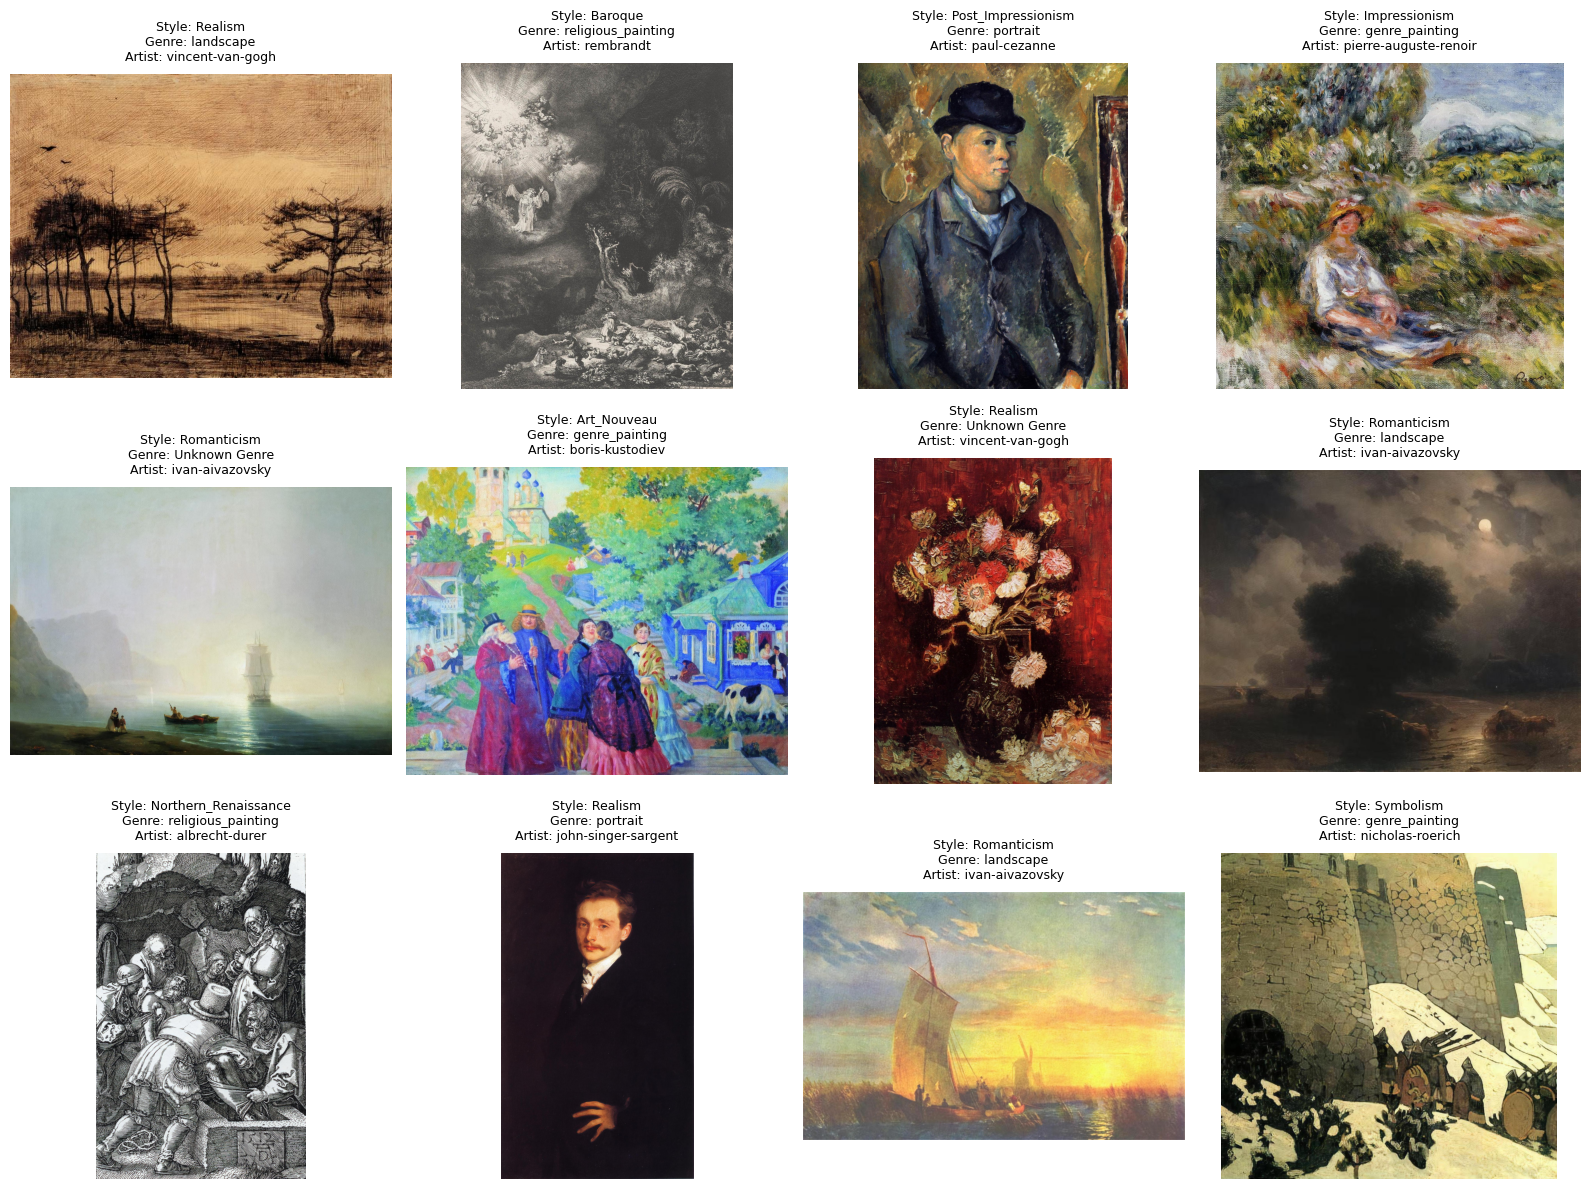


=== Sample Details ===

Image 1:
  Style: Realism
  Genre: landscape
  Artist: vincent-van-gogh

Image 2:
  Style: Baroque
  Genre: religious_painting
  Artist: rembrandt

Image 3:
  Style: Post_Impressionism
  Genre: portrait
  Artist: paul-cezanne

Image 4:
  Style: Impressionism
  Genre: genre_painting
  Artist: pierre-auguste-renoir

Image 5:
  Style: Romanticism
  Genre: Unknown Genre
  Artist: ivan-aivazovsky

Image 6:
  Style: Art_Nouveau
  Genre: genre_painting
  Artist: boris-kustodiev

Image 7:
  Style: Realism
  Genre: Unknown Genre
  Artist: vincent-van-gogh

Image 8:
  Style: Romanticism
  Genre: landscape
  Artist: ivan-aivazovsky

Image 9:
  Style: Northern_Renaissance
  Genre: religious_painting
  Artist: albrecht-durer

Image 10:
  Style: Realism
  Genre: portrait
  Artist: john-singer-sargent


In [ ]:
import matplotlib.pyplot as plt
from datasets import load_dataset

# Load a small sample of the dataset
wikiart_sample = load_dataset("huggan/wikiart", split="train[:20]")

# Get label names
style_names = wikiart_sample.features['style'].names
genre_names = wikiart_sample.features['genre'].names
artist_names = wikiart_sample.features['artist'].names

# Display 12 artworks in a grid
fig, axes = plt.subplots(3, 4, figsize=(16, 12))
axes = axes.flatten()

for idx in range(min(12, len(wikiart_sample))):
    sample = wikiart_sample[idx]

    # Get the image
    img = sample['image']

    # Get labels
    style = style_names[sample['style']] if sample['style'] is not None else "Unknown"
    genre = genre_names[sample['genre']] if sample['genre'] is not None else "Unknown"
    artist = artist_names[sample['artist']] if sample['artist'] is not None else "Unknown"

    # Display image
    axes[idx].imshow(img)
    axes[idx].axis('off')

    # Add title with all labels
    title = f"Style: {style}\nGenre: {genre}\nArtist: {artist}"
    axes[idx].set_title(title, fontsize=9, pad=10)

plt.tight_layout()
plt.savefig('wikiart_samples.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n=== Sample Details ===")
for idx in range(min(10, len(wikiart_sample))):
    sample = wikiart_sample[idx]
    print(f"\nImage {idx+1}:")
    print(f"  Style: {style_names[sample['style']]}")
    print(f"  Genre: {genre_names[sample['genre']]}")
    print(f"  Artist: {artist_names[sample['artist']]}")


In [ ]:
import numpy as np
from sklearn.decomposition import PCA

# Load features and labels
X = np.load("features.npy")
y = np.load("labels.npy")

print(f"Loaded features shape: {X.shape}")
print(f"Loaded labels shape: {y.shape}")

# Reduce to 512 dimensions using PCA (as in the paper)
pca = PCA(n_components=512)
X_512 = pca.fit_transform(X)
print(f"Reduced features shape: {X_512.shape}")

# Save reduced features
np.save("features_512.npy", X_512)


Loaded features shape: (5000, 2048)
Loaded labels shape: (5000,)
Reduced features shape: (5000, 512)


In [ ]:
from metric_learn import LMNN, ITML_Supervised, NCA, MLKR
from sklearn.model_selection import train_test_split

# Split into train/test for metric learning and classification
X_train, X_test, y_train, y_test = train_test_split(X_512, y, test_size=0.3, random_state=42, stratify=y)

print(f"Training set: {X_train.shape}, Test set: {X_test.shape}")

# Initialize metric learning algorithms
metrics = {
    "LMNN": LMNN(k=3, learn_rate=1e-6, max_iter=100, verbose=True),
    "ITML": ITML_Supervised(num_constraints=200, verbose=True),
    "NCA": NCA(max_iter=100, verbose=True),
    "MLKR": MLKR(max_iter=100, verbose=True),
}

# Train each metric
trained_models = {}
for name, model in metrics.items():
    print(f"\n--- Training {name} ---")
    try:
        model.fit(X_train, y_train)
        trained_models[name] = model
        print(f"{name} trained successfully!")
    except Exception as e:
        print(f"Error training {name}: {e}")


Training set: (3500, 512), Test set: (1500, 512)

--- Training LMNN ---


/usr/local/lib/python3.12/dist-packages/metric_learn/lmnn.py:140: FutureWarning: "num_chunks" parameter has been renamed to "n_chunks". It has been deprecated in version 0.6.3 and will be removed in 0.7.0
  warnings.warn('"num_chunks" parameter has been renamed to'
/usr/local/lib/python3.12/dist-packages/metric_learn/itml.py:367: FutureWarning: "num_constraints" parameter has been renamed to "n_constraints". It has been deprecated in version 0.6.3 and will be removed in 0.7.0
  warnings.warn('"num_constraints" parameter has been renamed to'
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


iter | objective | objective difference | active constraints | learning rate
2 7639016.481871159 -5416693.022228039 62777 1.2624999999999998e-07
3 6533391.242647068 -1105625.2392240912 50123 1.2751249999999997e-07
4 6024626.542254921 -508764.7003921466 44441 1.2878762499999996e-07
5 5673845.955148395 -350780.5871065259 40607 1.3007550124999997e-07
6 5403351.092651151 -270494.86249724403 37815 1.3137625626249998e-07
7 5181025.903999802 -222325.1886513494 35630 1.32690018825125e-07
8 4991086.192590565 -189939.7114092363 33821 1.3401691901337624e-07
9 4825045.121625431 -166041.07096513454 32218 1.3535708820351e-07
10 4677543.976638972 -147501.14498645905 30800 1.367106590855451e-07
11 4544405.5249184575 -133138.45172051433 29582 1.3807776567640056e-07
12 4422951.764882627 -121453.76003583055 28501 1.3945854333316457e-07
13 4310954.751187013 -111997.01369561348 27569 1.4085312876649622e-07
14 4206833.692968668 -104121.05821834505 26680 1.4226166005416118e-07
15 4109621.8953873375 -97211.79

/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


itml iter: 0, conv = 14.137283
itml iter: 1, conv = 0.221803
itml iter: 2, conv = 0.001000
itml converged at iter: 3, conv = 0.000004
ITML trained successfully!

--- Training NCA ---
[NCA]
[NCA]  Iteration      Objective Value    Time(s)
[NCA] ------------------------------------------


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[NCA]          0         2.268654e+03       2.94
[NCA]          1         2.316092e+03       2.91
[NCA]          2         2.347682e+03       3.77
[NCA]          3         2.380475e+03       2.91
[NCA]          4         2.399712e+03       2.78
[NCA]          5         2.409291e+03       2.76
[NCA]          6         2.415806e+03       3.71
[NCA]          7         2.417809e+03       2.77
[NCA]          8         2.418006e+03       2.75
[NCA]          9         2.418137e+03       2.75
[NCA]         10         2.419109e+03       3.77
[NCA]         11         2.419619e+03       2.74
[NCA]         12         2.420280e+03       2.74
[NCA]         13         2.428631e+03       2.80
[NCA]         14         2.430707e+03       3.89
[NCA]         15         2.431783e+03       2.78
[NCA]         16         2.431998e+03       2.74
[NCA]         17         2.432998e+03       2.76
[NCA]         18         2.436379e+03       3.81
[NCA]         19         2.438296e+03       2.73
[NCA]         20    

/usr/local/lib/python3.12/dist-packages/metric_learn/nca.py:176: ConvergenceWarning: [NCA] NCA did not converge: STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT
  warnings.warn('[{}] NCA did not converge: {}'.format(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[MLKR]          0         1.244281e+05       2.78
[MLKR]          1         1.159849e+05       2.60
[MLKR]          2         1.129975e+05       2.57
[MLKR]          3         1.090695e+05       3.28
[MLKR]          4         1.068008e+05       2.96
[MLKR]          5         1.056719e+05       2.53
[MLKR]          6         1.051039e+05       2.53
[MLKR]          7         1.047626e+05       2.53
[MLKR]          8         1.038030e+05       3.49
[MLKR]          9         1.032727e+05       2.53
[MLKR]         10         1.027252e+05       2.54
[MLKR]         11         1.024359e+05       2.54
[MLKR]         12         1.020715e+05       3.52
[MLKR]         13         1.020617e+05       2.64
[MLKR]         14         1.020136e+05       2.53
[MLKR]         15         1.018575e+05       2.50
[MLKR]         16         1.017763e+05       2.54
[MLKR]         17         1.017409e+05       3.39
[MLKR]         18         1.016716e+05       2.46
[MLKR]         19         1.016712e+05       2.51


/usr/local/lib/python3.12/dist-packages/metric_learn/mlkr.py:163: ConvergenceWarning: [MLKR] MLKR did not converge: STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT
  warnings.warn('[{}] MLKR did not converge: {}'


In [ ]:
# Transform features using each learned metric
X_train_proj = {}
X_test_proj = {}

for name, model in trained_models.items():
    print(f"Projecting features using {name}...")
    X_train_proj[name] = model.transform(X_train)
    X_test_proj[name] = model.transform(X_test)
    print(f"{name} projection shape: {X_train_proj[name].shape}")


Projecting features using LMNN...
LMNN projection shape: (3500, 512)
Projecting features using ITML...
ITML projection shape: (3500, 512)
Projecting features using NCA...


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12

NCA projection shape: (3500, 512)
Projecting features using MLKR...
MLKR projection shape: (3500, 512)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Train and evaluate SVM for each metric
results = {}

for name in trained_models.keys():
    print(f"\n--- Classifying with {name} ---")
    clf = SVC(kernel='linear', C=10, random_state=42)
    clf.fit(X_train_proj[name], y_train)

    y_pred = clf.predict(X_test_proj[name])
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

    print(f"{name} Accuracy: {acc*100:.2f}%")
    print(classification_report(y_test, y_pred, zero_division=0))

# Display summary
print("\n=== RESULTS SUMMARY ===")
for name, acc in results.items():
    print(f"{name}: {acc*100:.2f}%")



--- Classifying with LMNN ---
LMNN Accuracy: 66.20%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           2       1.00      1.00      1.00         3
           3       0.57      0.64      0.60       108
           4       0.73      0.72      0.73        61
           7       0.67      0.53      0.59        38
           9       0.34      0.38      0.36        60
          10       0.00      0.00      0.00         2
          12       0.73      0.80      0.76       431
          15       0.63      0.47      0.53        58
          17       0.75      0.74      0.74        68
          18       0.67      0.40      0.50         5
          20       0.48      0.41      0.44       153
          21       0.61      0.61      0.61       282
          23       0.87      0.83      0.85       115
          24       0.71      0.74      0.72       110
          25       0.00      0.00      0.00         4

    accuracy               

In [ ]:
print("\n--- Baseline (No Metric Learning) ---")
clf_baseline = SVC(kernel='linear', C=10, random_state=42)
clf_baseline.fit(X_train, y_train)
y_pred_baseline = clf_baseline.predict(X_test)
acc_baseline = accuracy_score(y_test, y_pred_baseline)
print(f"Baseline Accuracy: {acc_baseline*100:.2f}%")
results["Baseline"] = acc_baseline



--- Baseline (No Metric Learning) ---
Baseline Accuracy: 67.27%


In [ ]:
# Concatenate all projected features
X_train_fused = np.concatenate([X_train_proj[name] for name in trained_models.keys()], axis=1)
X_test_fused = np.concatenate([X_test_proj[name] for name in trained_models.keys()], axis=1)

print(f"Fused feature shape: {X_train_fused.shape}")

# Train SVM on fused features
clf_fused = SVC(kernel='linear', C=10, random_state=42)
clf_fused.fit(X_train_fused, y_train)
y_pred_fused = clf_fused.predict(X_test_fused)
acc_fused = accuracy_score(y_test, y_pred_fused)

print(f"\nFeature Fusion Accuracy: {acc_fused*100:.2f}%")
results["Feature Fusion"] = acc_fused


Fused feature shape: (3500, 2048)

Feature Fusion Accuracy: 67.47%


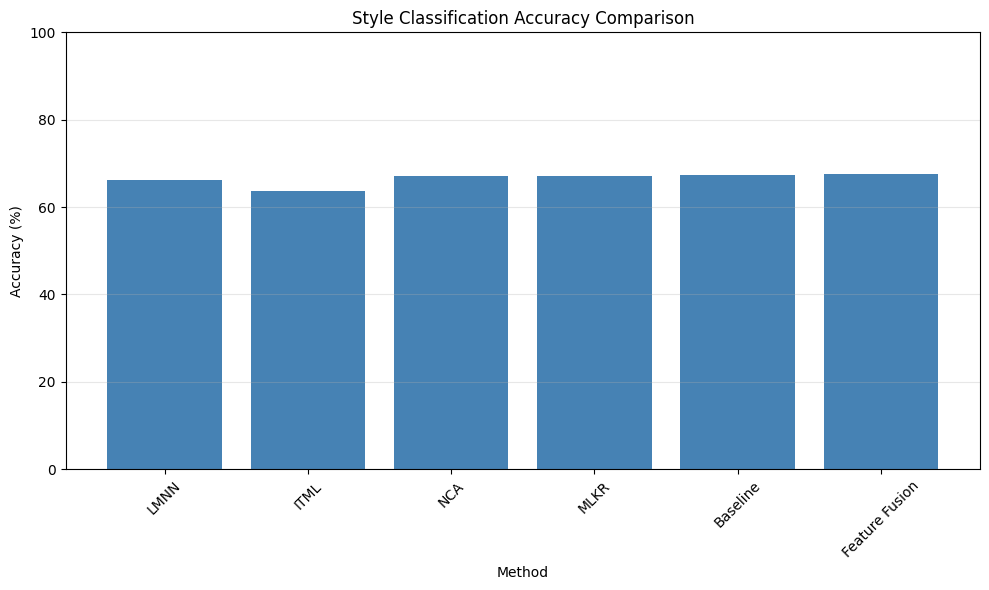

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy comparison
names = list(results.keys())
accuracies = [results[n]*100 for n in names]

plt.figure(figsize=(10,6))
plt.bar(names, accuracies, color='steelblue')
plt.xlabel('Method')
plt.ylabel('Accuracy (%)')
plt.title('Style Classification Accuracy Comparison')
plt.xticks(rotation=45)
plt.ylim([0, 100])
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


In [ ]:
import joblib

# Save all trained metric models
for name, model in trained_models.items():
    joblib.dump(model, f"{name}_model.pkl")
    print(f"Saved {name} model")

# Save the fused classifier
joblib.dump(clf_fused, "fused_classifier.pkl")
print("Saved fused classifier")


Saved LMNN model
Saved ITML model
Saved NCA model
Saved MLKR model
Saved fused classifier


***Classeme features***

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

def extract_classeme_features(images):
    """
    Extract Classeme-like features using VGG16 intermediate layers
    Classemes represent object category presence confidence scores
    """
    # Use VGG16 with intermediate layer extraction (more semantic than final CNN layer)
    base_model = VGG16(weights='imagenet', include_top=True)

    # Extract from the second-to-last dense layer (fc2) - more semantic
    classeme_model = tf.keras.Model(
        inputs=base_model.input,
        outputs=base_model.get_layer('fc2').output  # 4096-dim semantic features
    )

    images = preprocess_input(images)
    features = classeme_model.predict(images, verbose=0)
    return features

def process_classeme_features(dataset, save_path="classeme_features.npy", label_path="classeme_labels.npy"):
    batch_size = 16  # Smaller batch for stability
    feature_batches = []
    label_batches = []

    for i in tqdm(range(0, len(dataset), batch_size)):
        batch = dataset[i:i+batch_size]

        # Convert images to numpy arrays
        np_images = []
        valid_indices = []

        for idx, img in enumerate(batch["image"]):
            try:
                # Convert to RGB and resize
                if img.mode != 'RGB':
                    img = img.convert('RGB')
                arr = np.array(img.resize((224, 224)))
                np_images.append(arr)
                valid_indices.append(idx)
            except Exception as e:
                print(f"Skipping image {i+idx}: {e}")
                continue

        if len(np_images) == 0:
            continue

        np_images = np.array(np_images)

        # Extract Classeme features
        feats = extract_classeme_features(np_images)

        # Get corresponding labels (only for valid images)
        valid_labels = [batch["style"][idx] for idx in valid_indices]

        feature_batches.append(feats)
        label_batches.append(np.array(valid_labels))

        # Clean memory
        del np_images
        del batch
        tf.keras.backend.clear_session()

    # Concatenate all batches
    all_features = np.vstack(feature_batches)
    all_labels = np.concatenate(label_batches)

    print(f"Extracted features shape: {all_features.shape}")
    print(f"Labels shape: {all_labels.shape}")

    # Save features and labels
    np.save(save_path, all_features)
    np.save(label_path, all_labels)
    print(f"Saved Classeme features to {save_path}")

# Extract Classeme features
process_classeme_features(wikiart)

  0%|          | 0/313 [00:00<?, ?it/s]

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 22s 0us/step


100%|██████████| 313/313 [21:43<00:00,  4.16s/it]

Extracted features shape: (5000, 4096)
Labels shape: (5000,)
Saved Classeme features to classeme_features.npy


In [ ]:
import numpy as np
from sklearn.decomposition import PCA

# Load Classeme features
X_classeme = np.load("classeme_features.npy")
y = np.load("classeme_labels.npy")

print(f"Original Classeme features shape: {X_classeme.shape}")

# Reduce to 512 dimensions (as in paper)
pca = PCA(n_components=512)
X_512 = pca.fit_transform(X_classeme)

print(f"Reduced Classeme features shape: {X_512.shape}")
print(f"PCA explained variance ratio (first 10): {pca.explained_variance_ratio_[:10]}")

# Filter out invalid labels (if any)
valid_indices = y >= 0
X_512 = X_512[valid_indices]
y = y[valid_indices]

print(f"Final dataset: {X_512.shape[0]} samples, {len(np.unique(y))} unique styles")


Original Classeme features shape: (5000, 4096)
Reduced Classeme features shape: (5000, 512)
PCA explained variance ratio (first 10): [0.06742579 0.04005673 0.03397388 0.02870011 0.02382719 0.0214812
 0.0186355  0.01719218 0.01580481 0.01545149]
Final dataset: 5000 samples, 16 unique styles


In [ ]:
from metric_learn import LMNN, ITML_Supervised, NCA, MLKR
from sklearn.model_selection import train_test_split

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_512, y, test_size=0.3, random_state=42, stratify=y)

print(f"Training: {X_train.shape}, Testing: {X_test.shape}")
print(f"Unique classes in training: {len(np.unique(y_train))}")

# Initialize metric learning algorithms with Classeme-optimized parameters
metrics = {
    "LMNN": LMNN(k=3, learn_rate=1e-6, max_iter=100, verbose=True),
    "ITML": ITML_Supervised(num_constraints=500, verbose=True),  # More constraints for Classeme
    "NCA": NCA(max_iter=100, verbose=True),
    "MLKR": MLKR(max_iter=50, verbose=True),  # Limited iterations
}

# Train metrics on Classeme features
trained_models = {}
for name, model in metrics.items():
    print(f"\n--- Training {name} on Classeme Features ---")
    try:
        model.fit(X_train, y_train)
        trained_models[name] = model
        print(f"{name} trained successfully on Classeme features!")
    except Exception as e:
        print(f"Error training {name}: {e}")


Training: (3500, 512), Testing: (1500, 512)
Unique classes in training: 16

--- Training LMNN on Classeme Features ---


/usr/local/lib/python3.12/dist-packages/metric_learn/lmnn.py:140: FutureWarning: "num_chunks" parameter has been renamed to "n_chunks". It has been deprecated in version 0.6.3 and will be removed in 0.7.0
  warnings.warn('"num_chunks" parameter has been renamed to'
/usr/local/lib/python3.12/dist-packages/metric_learn/itml.py:367: FutureWarning: "num_constraints" parameter has been renamed to "n_constraints". It has been deprecated in version 0.6.3 and will be removed in 0.7.0
  warnings.warn('"num_constraints" parameter has been renamed to'
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


iter | objective | objective difference | active constraints | learning rate
2 22487403.850996926 -13649977.973127708 74470 6.312499999999999e-08
3 18620232.00561075 -3867171.8453861773 57796 6.375624999999999e-08
4 16992196.635792494 -1628035.3698182553 51616 6.439381249999998e-08
5 15833521.930535205 -1158674.705257289 47646 6.503775062499999e-08
6 14912705.523968369 -920816.4065668359 44599 6.568812813124999e-08
7 14144044.278240005 -768661.2457283642 42100 6.63450094125625e-08
8 13481983.719120326 -662060.559119679 40074 6.700845950668812e-08
9 12899325.762144117 -582657.9569762088 38278 6.7678544101755e-08
10 12379689.672177404 -519636.0899667125 36778 6.835532954277255e-08
11 11909052.472884966 -470637.1992924381 35379 6.903888283820028e-08
12 11479445.282652436 -429607.19023253024 34175 6.972927166658228e-08
13 11084417.599150242 -395027.68350219354 33083 7.042656438324811e-08
14 10718747.00608711 -365670.59306313284 32018 7.113083002708059e-08
15 10379275.968977256 -339471.0371

/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


itml iter: 0, conv = 22.317434
itml iter: 1, conv = 1.181245
itml iter: 2, conv = 0.041001
itml converged at iter: 3, conv = 0.000976
ITML trained successfully on Classeme features!

--- Training NCA on Classeme Features ---
[NCA]
[NCA]  Iteration      Objective Value    Time(s)
[NCA] ------------------------------------------


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[NCA]          0         1.985071e+03       1.85
[NCA]          1         2.015876e+03       1.91
[NCA]          2         2.028692e+03       1.94
[NCA]          3         2.051510e+03       1.93
[NCA]          4         2.062276e+03       2.36
[NCA]          5         2.065142e+03       2.55
[NCA]          6         2.070084e+03       1.88
[NCA]          7         2.072913e+03       1.95
[NCA]          8         2.073991e+03       1.89
[NCA]          9         2.073993e+03       1.95
[NCA]         10         2.073998e+03       2.34
[NCA]         11         2.074061e+03       2.39
[NCA]         12         2.075218e+03       1.89
[NCA]         13         2.078000e+03       1.87
[NCA]         14         2.078000e+03       1.94
[NCA]         15         2.078030e+03       1.88
[NCA]         16         2.079091e+03       2.45
[NCA]         17         2.081312e+03       2.41
[NCA]         18         2.082059e+03       1.85
[NCA]         19         2.082954e+03       1.87
[NCA]         20    

/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[MLKR]          0         1.565594e+05       1.85
[MLKR]          1         1.550093e+05       1.92
[MLKR]          2         1.514040e+05       1.88
[MLKR]          3         1.515202e+05       2.88
[MLKR]          4         1.502148e+05       1.87
[MLKR]          5         1.490578e+05       1.90
[MLKR]          6         1.480620e+05       1.88
[MLKR]          7         1.477471e+05       1.90
[MLKR]          8         1.473145e+05       1.85
[MLKR]          9         1.472262e+05       2.85
[MLKR]         10         1.468143e+05       1.85
[MLKR]         11         1.464634e+05       1.88
[MLKR]         12         1.460078e+05       1.89
[MLKR]         13         1.458107e+05       1.86
[MLKR]         14         1.456508e+05       1.84
[MLKR]         15         1.454135e+05       2.83
[MLKR]         16         1.454472e+05       1.86
[MLKR]         17         1.453984e+05       1.90
[MLKR]         18         1.453395e+05       1.93
[MLKR]         19         1.453161e+05       1.86


/usr/local/lib/python3.12/dist-packages/metric_learn/mlkr.py:163: ConvergenceWarning: [MLKR] MLKR did not converge: STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT
  warnings.warn('[{}] MLKR did not converge: {}'


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Baseline (no metric learning)
print("=== BASELINE (Raw Classeme Features) ===")
clf_baseline = SVC(kernel='linear', C=10, random_state=42)
clf_baseline.fit(X_train, y_train)
y_pred_baseline = clf_baseline.predict(X_test)
acc_baseline = accuracy_score(y_test, y_pred_baseline)
print(f"Baseline Accuracy: {acc_baseline*100:.2f}%")

# Results with metric learning
results = {"Baseline": acc_baseline}

for name, model in trained_models.items():
    print(f"\n=== {name} + Classeme Features ===")

    # Transform features
    X_train_proj = model.transform(X_train)
    X_test_proj = model.transform(X_test)

    # Train SVM
    clf = SVC(kernel='linear', C=10, random_state=42)
    clf.fit(X_train_proj, y_train)

    # Evaluate
    y_pred = clf.predict(X_test_proj)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

    print(f"{name} + Classeme Accuracy: {acc*100:.2f}%")
    print(f"Improvement over baseline: {(acc-acc_baseline)*100:.2f}%")

print("\n=== FINAL RESULTS (Classeme Features) ===")
for name, acc in results.items():
    print(f"{name}: {acc*100:.2f}%")


=== BASELINE (Raw Classeme Features) ===
Baseline Accuracy: 61.27%

=== LMNN + Classeme Features ===


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


LMNN + Classeme Accuracy: 57.73%
Improvement over baseline: -3.53%

=== ITML + Classeme Features ===


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


ITML + Classeme Accuracy: 55.93%
Improvement over baseline: -5.33%

=== NCA + Classeme Features ===


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


NCA + Classeme Accuracy: 60.67%
Improvement over baseline: -0.60%

=== MLKR + Classeme Features ===


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


MLKR + Classeme Accuracy: 60.67%
Improvement over baseline: -0.60%

=== FINAL RESULTS (Classeme Features) ===
Baseline: 61.27%
LMNN: 57.73%
ITML: 55.93%
NCA: 60.67%
MLKR: 60.67%
